## 프린터기 문제

일반적인 프린터는 인쇄 요청이 들어온 순서대로 인쇄합니다. 그렇기 때문에 중요한 문서가 나중에 인쇄될 수 있습니다. 이런 문제를 보완하기 위해 중요도가 높은 문서를 먼저 인쇄하는 프린터를 개발했습니다. 이 새롭게 개발한 프린터는 아래와 같은 방식으로 인쇄 작업을 수행합니다.

1. 인쇄 대기목록의 가장 앞에 있는 문서(J)를 대기목록에서 꺼냅니다.
2. 나머지 인쇄 대기목록에서 J보다 중요도가 높은 문서가 한 개라도 존재하면 J를 대기목록의 가장 마지막에 넣습니다.
3. 그렇지 않으면 J를 인쇄합니다.

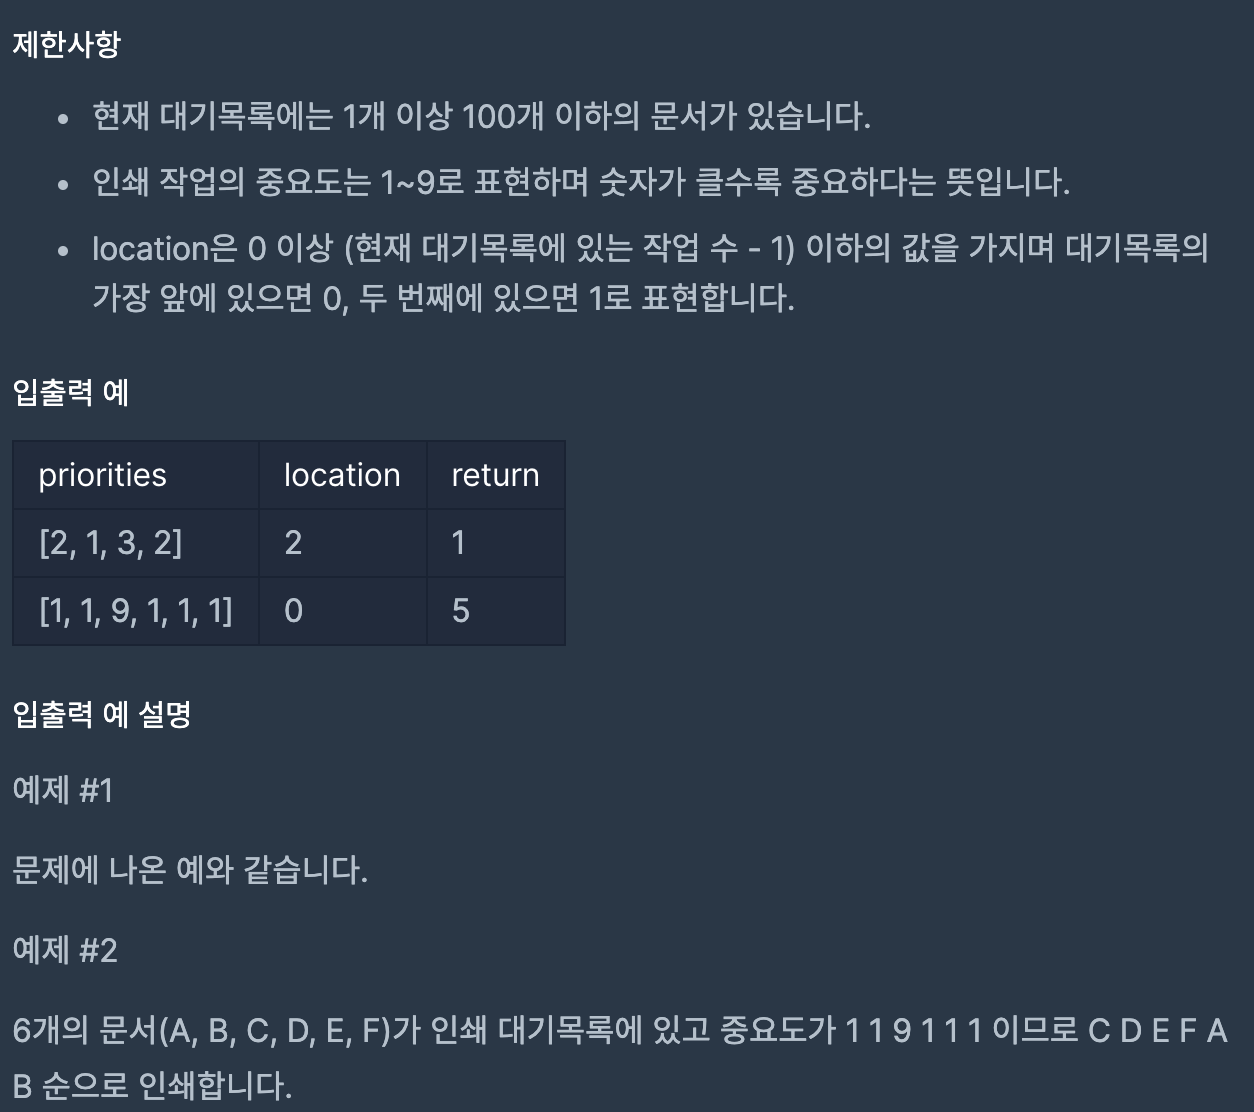

In [1]:
def solution(priorities, location):
    label = []
    for i in range(len(priorities)):
        label.append(i)
    target = label[location]
    answer = 1
    max = 0
    
    for i in range(0, len(priorities)-1):
        for k in range(i+1, len(priorities)):
            if max <= priorities[k]:
                max = priorities[k]

        while priorities[i] != max:
            if priorities[i] < max:
                priorities.append(priorities[i])
                del priorities[i]
                label.append(label[i])
                del label[i]
            else:
                break

        if priorities[i] == max:
            max = 0
                
    for i in range(len(priorities)):
        if label[i] == target:
            break

        else:
            answer = answer + 1

    return answer

In [2]:
priorities = [1,3,5,7]
label = [0,1,2,3]
#priorities = [2,1,3,2]
#label = ['a', 'b', 'c', 'd']
location = 0
target = label[location]
count = 1
max = 0
for i in range(0, len(priorities)-1):
  print('i 자리수는', i)  
  for k in range(i+1, len(priorities)):
    if max <= priorities[k]:
      max = priorities[k]
      print('max는', max)

  while priorities[i] != max:
    if priorities[i] < max:
      priorities.append(priorities[i])
      del priorities[i]
      label.append(label[i])
      del label[i]
      print(priorities)
      print(label)
    else:
      break


  if priorities[i] == max:
      max = 0

print(target)
for i in range(len(priorities)):
  if label[i] == target:
    break
  else:
    #print(i)
    count = count +1

print('count 는', count)

i 자리수는 0
max는 3
max는 5
max는 7
[3, 5, 7, 1]
[1, 2, 3, 0]
[5, 7, 1, 3]
[2, 3, 0, 1]
[7, 1, 3, 5]
[3, 0, 1, 2]
i 자리수는 1
max는 3
max는 5
[7, 3, 5, 1]
[3, 1, 2, 0]
[7, 5, 1, 3]
[3, 2, 0, 1]
i 자리수는 2
max는 3
[7, 5, 3, 1]
[3, 2, 1, 0]
0
count 는 4


In [3]:
## 다른사람 코드

from collections import deque
def solution(priorities, location):
    priorities_dict={}
    start=deque([])
    for i in range(len(priorities)):
        priorities_dict[i] = priorities[i]
        start.append(i)
    sequence=[]
    while start:
        maxval=max(priorities)
        if priorities_dict[start[0]]<maxval:
            start.append(start.popleft())
        else:
            sequence.append(start[0])
            priorities.remove(priorities_dict[start.popleft()])
    return sequence.index(location)+1

In [4]:
def solution(priorities, location):
    answer = 0  # 출력된 문서의 수
    prioDict = {}  # [문서 인덱스:그 문서 우선순위]

    # 각 문서의 인덱스와 우선순위를 저장
    for i, prio in enumerate(priorities):
        prioDict[i] = prio

    maxNum = max(prioDict.values())  # 최대값 구함

    while priorities[location] != 0:  # 값이 0이면 이미 출력된 문서. 찾으려는 문서가 출력되기 전까지 반복
        for i in prioDict:
            if prioDict[i] == maxNum:
                answer = answer + 1  # 출력문서수 +1

                if i == location:  # 이번 출력문서가 알고자 하는 문서라면 종료
                    return answer

                prioDict[i] = 0  # 출력된 문서는 우선순위 0으로 바꿔줌
                maxNum = max(prioDict.values())  # 알고자하는 문서 아니었다면 최대값 새로 구해주고 다시 반복

In [1]:
prioDict = {}
for i, prio in enumerate([1,3,5,2,7]):
        prioDict[i] = prio

In [2]:
max(prioDict.values())

7

In [3]:
prioDict

{0: 1, 1: 3, 2: 5, 3: 2, 4: 7}

In [5]:
[1,2,4,3][1]

2

In [7]:
prioDict[0]

1